## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2


%matplotlib inline

In [3]:
# passengers dataframe
passengers = pd.read_csv("passengers_2019.csv")
passengers.head(2)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,1,5600,0,0,0,0,228,60,48,...,US,United States,6,681,2,2019,6,1,P,DU
1,0,3,64500,0,0,0,0,165,146,87,...,US,United States,6,635,2,2019,6,1,P,DU


In [4]:
# fuel consumption dataframe
fuel = pd.read_csv("fuel_consumption.csv")
fuel.head(2)

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016


In [5]:
flights = pd.read_csv("flights.csv")
flights.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,...,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,AA,AA_CODESHARE,AA,3680,MQ,N248NN,3680,14027,PBI,...,857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
flights = flights[(flights['cancelled'] != 1)]

In [7]:
flights.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance

In [8]:
flights.shape

(1859372, 42)

In [9]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [10]:
flights.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,1.859372e+06,1.859372e+06,1.859372e+06,1.859372e+06,1.859372e+06,1.859372e+06,1.859372e+06,1.859372e+06,1.859372e+06,1.858199e+06,...,1.859372e+06,366801.000000,366801.000000,366801.000000,366801.000000,366801.000000,12123.000000,12121.000000,12123.000000,0.0
mean,2.687195e+03,2.687181e+03,1.268605e+04,1.268609e+04,1.328086e+03,1.335629e+03,1.078186e+01,1.809142e+01,1.361719e+03,1.474520e+03,...,7.722384e+02,21.103822,3.941189,16.190790,0.101622,26.867860,1281.085622,35.099414,34.582694,NaN
std,1.852014e+03,1.852133e+03,1.521646e+03,1.521882e+03,4.855347e+02,4.976434e+02,5.009434e+01,1.056289e+01,4.979964e+02,5.235621e+02,...,5.816798e+02,66.906459,35.889059,37.025696,3.701326,54.461312,511.263199,28.414851,27.337801,NaN
min,1.000000e+00,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,-6.300000e+01,0.000000e+00,1.000000e+00,1.000000e+00,...,3.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN
25%,1.088000e+03,1.088000e+03,1.129200e+04,1.129200e+04,9.190000e+02,9.220000e+02,-6.000000e+00,1.200000e+01,9.390000e+02,1.055000e+03,...,3.440000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,825.000000,16.000000,16.000000,NaN
50%,2.259000e+03,2.259000e+03,1.288900e+04,1.288900e+04,1.320000e+03,1.331000e+03,-2.000000e+00,1.500000e+01,1.345000e+03,1.510000e+03,...,6.120000e+02,0.000000,0.000000,4.000000,0.000000,1.000000,1236.000000,28.000000,27.000000,NaN
75%,4.158000e+03,4.157000e+03,1.405700e+04,1.405700e+04,1.730000e+03,1.741000e+03,7.000000e+00,2.100000e+01,1.757000e+03,1.913000e+03,...,1.013000e+03,17.000000,0.000000,20.000000,0.000000,32.000000,1725.000000,44.000000,44.000000,NaN
max,9.401000e+03,9.401000e+03,1.621800e+04,1.621800e+04,2.359000e+03,2.400000e+03,2.941000e+03,2.270000e+02,2.400000e+03,2.400000e+03,...,4.983000e+03,2592.000000,2900.000000,1516.000000,816.000000,2206.000000,2359.000000,295.000000,243.000000,NaN


In [11]:
flights.isnull().sum()

fl_date                      0
mkt_unique_carrier           0
branded_code_share           0
mkt_carrier                  0
mkt_carrier_fl_num           0
op_unique_carrier            0
tail_num                     0
op_carrier_fl_num            0
origin_airport_id            0
origin                       0
origin_city_name             0
dest_airport_id              0
dest                         0
dest_city_name               0
crs_dep_time                 0
dep_time                     0
dep_delay                    0
taxi_out                     0
wheels_off                   0
wheels_on                 1173
taxi_in                   1173
crs_arr_time                 0
arr_time                  1173
arr_delay                 4367
cancelled                    0
cancellation_code      1859372
diverted                     0
dup                          0
crs_elapsed_time             0
actual_elapsed_time       4367
air_time                  4367
flights                      0
distance

In [12]:
# columns to drop 
cols_to_drop = ['no_name','longest_add_gtime' ,'mkt_carrier','total_add_gtime', 'first_dep_time','cancellation_code',
                'cancelled', 'diverted','dup', 'op_carrier_fl_num','mkt_carrier_fl_num', 'carrier_delay','weather_delay','nas_delay',
                'security_delay','late_aircraft_delay', 'branded_code_share', 'origin_airport_id', 'dest_airport_id']

flights.drop(cols_to_drop, axis = 1, inplace = True)

In [13]:
flights.isnull().sum()

fl_date                   0
mkt_unique_carrier        0
op_unique_carrier         0
tail_num                  0
origin                    0
origin_city_name          0
dest                      0
dest_city_name            0
crs_dep_time              0
dep_time                  0
dep_delay                 0
taxi_out                  0
wheels_off                0
wheels_on              1173
taxi_in                1173
crs_arr_time              0
arr_time               1173
arr_delay              4367
crs_elapsed_time          0
actual_elapsed_time    4367
air_time               4367
flights                   0
distance                  0
dtype: int64

In [14]:
#Drop  missing data 
flights.dropna(inplace = True)

In [15]:
flights.isnull().sum()

fl_date                0
mkt_unique_carrier     0
op_unique_carrier      0
tail_num               0
origin                 0
origin_city_name       0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [16]:
flights.head(2)

,fl_date,mkt_unique_carrier,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
2,2019-01-01,AA,OH,N575NN,MYR,"Myrtle Beach, SC",CLT,"Charlotte, NC",2157,2158.0,...,2248.0,20.0,2311,2308.0,-3.0,74.0,70.0,40.0,1,157
3,2019-01-01,AA,OH,N254PS,BDL,"Hartford, CT",DCA,"Washington, DC",1151,1212.0,...,1328.0,3.0,1325,1331.0,6.0,94.0,79.0,69.0,1,313


In [17]:
flights.shape

(1855005, 23)

In [18]:
# create column for dep_time in hour
flights['deptime_hrs'] = flights['dep_time'].apply(lambda x: 0 if x < 100 else (
                                                1 if x < 200 else(
                                                2 if x < 300 else(
                                                3 if x < 400 else(
                                                4 if x < 500 else(
                                                5 if x < 600 else(
                                                6 if x < 700 else(
                                                7 if x < 800 else(
                                                8 if x < 900 else(
                                                9 if x < 1000 else(
                                                10 if x < 1100 else(
                                                11 if x < 1200 else(
                                                12 if x < 1300 else(
                                                13 if x < 1400 else(
                                                14 if x < 1500 else(
                                                15 if x < 1600 else(
                                                16 if x < 1700 else(
                                                17 if x < 1800 else(
                                                18 if x < 1900 else(
                                                19 if x < 2000 else(
                                                20 if x < 2100 else(
                                                21 if x < 2200 else(
                                                22 if x < 2300 else(
                                                23 if x <= 2400 else 24 
                                                ))))))))))))))))))))))))

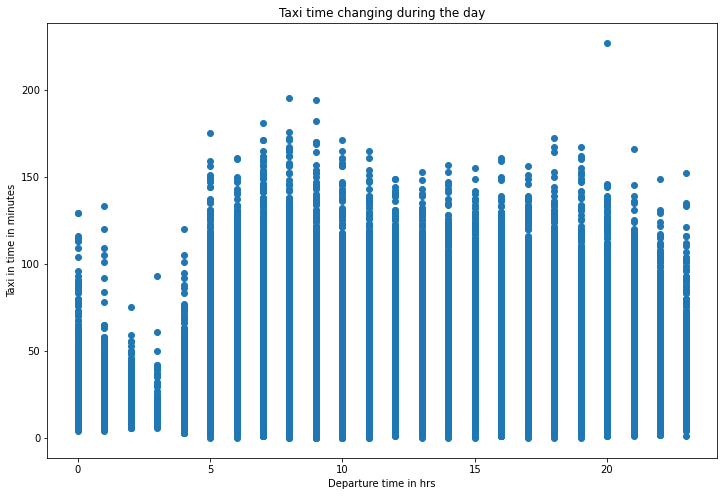

In [19]:
# Plot showing relationship between the taxi out time and actual departure time 
data = flights[['taxi_out', 'deptime_hrs']]

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

plt.scatter(data=data, y = 'taxi_out', x= 'deptime_hrs')
plt.ylabel("Taxi in time in minutes")
plt.xlabel("Departure time in hrs")
plt.title("Taxi time changing during the day");

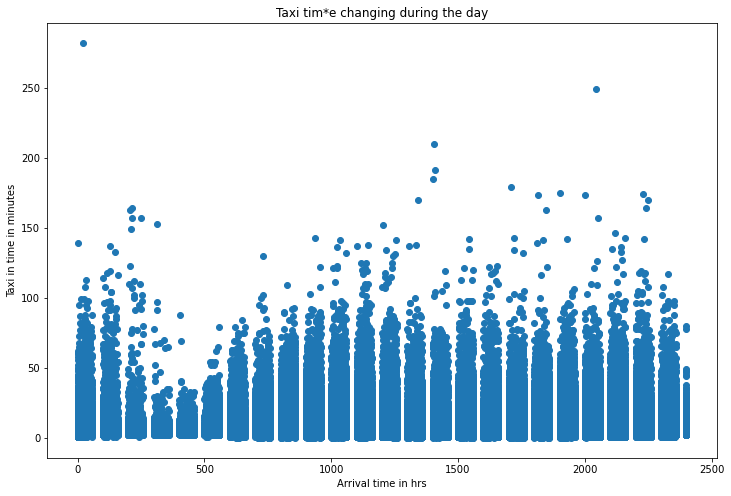

In [20]:
# Plot showing relationship between the taxi in time and actual arrival time 
data = flights[['taxi_in','arr_time' ]]

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

plt.scatter(data=data, y = 'taxi_in', x= 'arr_time')
plt.ylabel("Taxi in time in minutes")
plt.xlabel("Arrival time in hrs")
plt.title("Taxi tim*e changing during the day");

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [21]:
#Filter for total arrival delay
totalArrDelay = flights[flights['arr_delay'] > 0]
totalArrDelay.shape

(662440, 24)

In [22]:
# Filter for arrival delay already created before departure
arrDepDelay = totalArrDelay[(totalArrDelay['dep_delay']>0)]
arrDepDelay.shape

(465022, 24)

In [23]:
# average percentage of delays already created before departure
print("Percentage of delays already created before departure is: ", (arrDepDelay.shape[0]/ totalArrDelay.shape[0])* 100,"%")

Percentage of delays already created before departure is:  70.19835758710224 %


In [24]:
# Are airlines able to lower the delay durig the flights
totalDepDelay = flights[(flights['dep_delay']>0)]
totalDepDelay.shape                 

(635452, 24)

In [25]:
arrDepDelay_lowered= totalDepDelay[(totalDepDelay['arr_delay'] <= 0)]
arrDepDelay_lowered.shape

(170430, 24)

In [26]:
# average percentage of delays lowered during the flight
print("Percentage of delays airlines are able to lower during the flight is: ", (arrDepDelay_lowered.shape[0]/ totalDepDelay.shape[0])* 100,"%")

Percentage of delays airlines are able to lower during the flight is:  26.82027910841417 %


#### **Task 6**: How many states cover 50% of US air traffic? 

In [27]:
# Filter to get origin city names
flights_traffic= flights.filter(['origin_city_name', 'dest_city_name', 'fl_date'])

In [28]:
# Getting state name from flights_traffic
flights_traffic['origin_state'] = flights_traffic['origin_city_name'].apply(lambda x: x.split(', ')[1])
flights_traffic['dest_state'] =flights_traffic['dest_city_name'].apply(lambda x: x.split(', ')[1])

In [29]:
# Group number of flights by origin state  
origin_traffic = flights_traffic.groupby('origin_state')['fl_date'].count().sort_values(ascending=False).head(10)
origin_traffic

origin_state
CA    201761
TX    185962
FL    151800
IL    108973
GA     98926
NY     96711
NC     87141
CO     72624
DC     54679
PA     53436
Name: fl_date, dtype: int64

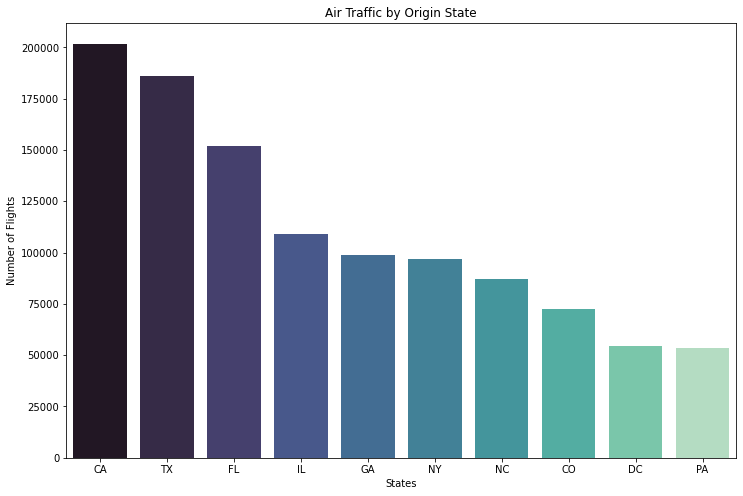

In [138]:
# Barplot for traffic from Origin 
sns.barplot(x = origin_traffic.index ,y = origin_traffic.values, palette='mako')
plt.ylabel("Number of Flights")
plt.xlabel("States")
plt.title("Air Traffic by Origin State")

plt.show();

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [31]:
dd_test= flights.filter(['dep_delay', 'distance', 'air_time'])

In [32]:
dd_test['speed'] = dd_test['distance']/(dd_test['air_time']/60)
delayed_flights = dd_test[dd_test['dep_delay'] > 0]
nondelayed_flights = dd_test[dd_test['dep_delay'] <= 0]

avg_delay = delayed_flights['speed'].mean()
avg_nondelay = nondelayed_flights['speed'].mean()

print('Average Speed of Delayed Flights to Destination:', avg_delay)
print('Average Speed of Non-Delayed Flights to Destintion:', avg_nondelay)
print('Percentage increase in speed of Delayed Flights against Non_Delayed flights to Destination:', ((avg_delay-avg_nondelay)/avg_delay)*100)

Average Speed of Delayed Flights to Destination: 403.2431958360581
Average Speed of Non-Delayed Flights to Destintion: 392.2883980334349
Percentage increase in speed of Delayed Flights against Non_Delayed flights to Destination: 2.7166726967110364


Text(0, 0.5, 'Average Speed')

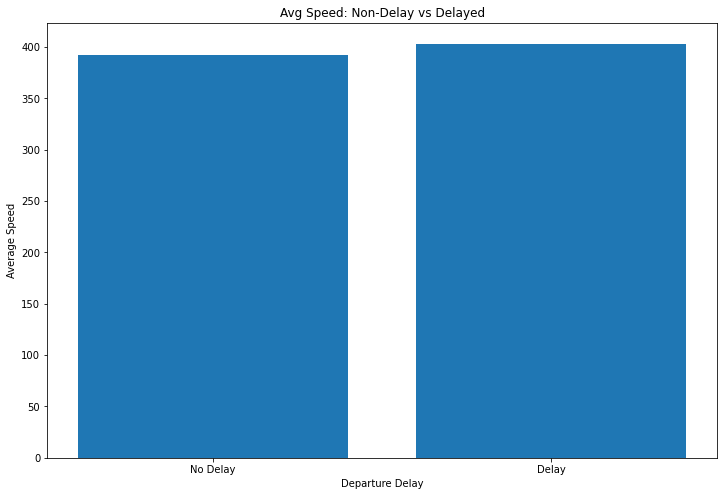

In [33]:
plt.bar(['No Delay', 'Delay'],[avg_nondelay,avg_delay])
plt.title('Avg Speed: Non-Delay vs Delayed')
plt.xlabel('Departure Delay')
plt.ylabel('Average Speed')

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [34]:
# Create new column withh haul flights from air time 

def haul(df):
    '''Add a column to determine flight haul (short, medium, long) based on air_time'''
    length=[]
    for i in df.air_time:
        if i <= (180): # up to 3 hours
            length.append('short')
        elif  (i <= (360)): # 3-6 hours
            length.append('medium')
        elif i > (360):
            length.append('long') # 6+ hours
    flights['haul_length'] = length

haul(flights)

In [35]:
flights.head(2)

,fl_date,mkt_unique_carrier,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,deptime_hrs,haul_length
2,2019-01-01,AA,OH,N575NN,MYR,"Myrtle Beach, SC",CLT,"Charlotte, NC",2157,2158.0,...,2311,2308.0,-3.0,74.0,70.0,40.0,1,157,21,short
3,2019-01-01,AA,OH,N254PS,BDL,"Hartford, CT",DCA,"Washington, DC",1151,1212.0,...,1325,1331.0,6.0,94.0,79.0,69.0,1,313,12,short


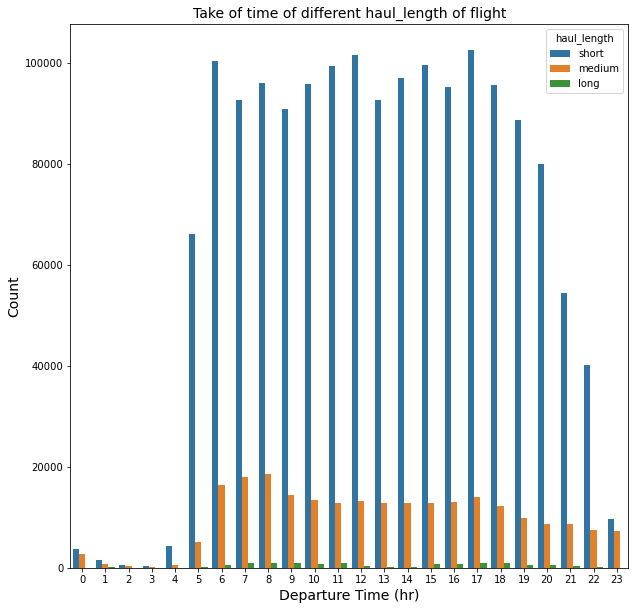

In [36]:
plt.figure(figsize=(10, 10))
sns.countplot(data=flights, x='deptime_hrs', hue='haul_length')

plt.title("Take of time of different haul_length of flight", size = 14)
plt.xlabel("Departure Time (hr)", size = 14)
plt.ylabel("Count", size = 14);

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [37]:
origin_airport = flights[['origin', 'flights']].groupby('origin')['flights'].count().sort_values(ascending=False).head(10)
origin_airport

origin
ATL    92692
ORD    86395
DFW    67390
DEN    62246
CLT    60342
LAX    58947
PHX    44364
IAH    43389
SEA    42499
DTW    40347
Name: flights, dtype: int64

In [38]:
passengers.groupby('origin')['passengers'].sum().sort_values(ascending=False)


origin
ATL    53862700
LAX    43362936
ORD    41009603
DFW    35873581
DEN    33891355
         ...   
HLI           0
OSC           0
HLM           0
SGN           0
II3           0
Name: passengers, Length: 1852, dtype: int64

In [39]:
num_passengers = passengers.groupby('origin')['passengers'].sum().reset_index().rename({'passengers': 'total_passengers'}, axis=1)
num_passengers = num_passengers.sort_values(by='total_passengers', ascending=False).head(10)

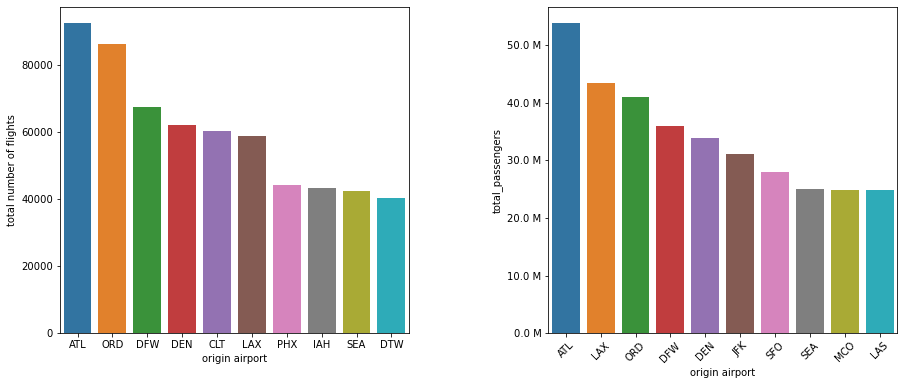

In [40]:
import matplotlib.ticker as ticker
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax1 = sns.barplot(x=origin_airport.index, y=origin_airport.values,ax=axes[0])
ax1.set_ylabel('total number of flights' , fontsize = 10)
ax1.set_xlabel('origin airport' , fontsize = 10)
plt.xticks(rotation=45)

ax2 = sns.barplot(x='origin', y='total_passengers', data=num_passengers, ax=axes[1], palette="tab10")
ax2.yaxis.set_major_formatter(million_formatter)
ax2.tick_params(axis='x', rotation=45)
ax2.set_xlabel('origin airport' , fontsize = 10)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [118]:
# Average Arrival delay for January 2019
filt = (flights['fl_date'] > '2019-01-01') & (flights['fl_date'] <= '2019-01-31')
avgMonthly_delayJan =flights[filt].groupby(['mkt_unique_carrier'])['arr_delay'].mean()
avgMonthly_delayJan 

mkt_unique_carrier
AA    4.7611038392
AS    0.8682661702
B6   14.1175505498
DL    2.3492978860
F9    6.7049500651
G4    9.8240626921
HA    0.3882077421
NK    2.8698294317
UA   11.4932978001
WN   -0.8955355243
Name: arr_delay, dtype: float64

In [72]:
# distance covered in Jan 2019 by different air carriers
dist_jan = flights[filt].groupby(['mkt_unique_carrier'])['distance'].sum()
dist_jan

mkt_unique_carrier
AA    109204424
AS     32786227
B6     25179426
DL     91691699
F9      9831795
G4      5916381
HA      4883746
NK     14732135
UA     89667719
WN     76089105
Name: distance, dtype: int64

In [73]:
# NUmber of passengers carried January 2019
filt1 = ( passengers['month'] ==1) & (passengers['carrier'].isin(['AA','AS','B6','DL','F9','G4','HA','NK','UA','WN']))
pass_jan = passengers[filt1].groupby(['carrier'])['passengers'].sum()
pass_jan 

carrier
AA    11890601
AS     2580332
B6     3265890
DL    11224123
F9     1626946
G4      937311
HA      940989
NK     2438941
UA     8283350
WN    12279424
Name: passengers, dtype: int64

In [74]:
# fuel consumption per carrier Jan 2019
filt2 = (fuel['month'] ==1) & (fuel['year'] == 2019) & (fuel['carrier'].isin(['AA','AS','B6','DL','F9','G4','HA','NK','UA','WN']))
fuel_jan = fuel[filt2].groupby(['carrier'])['total_gallons'].sum()
fuel_jan 

carrier
AA   286544730.00000
AS    57084165.00000
B6    70408211.00000
DL   273706863.00000
F9    21842481.00000
G4    12784069.00000
HA    22626587.00000
NK    35862515.00000
UA   270112946.00000
WN   164881708.00000
Name: total_gallons, dtype: float64

In [90]:
### average fuel comsumption per passenger per km
avg_fuel_per_km_pass =  (fuel_jan/pass_jan)/(dist_jan*1.60934)
pd.set_option('display.float_format', lambda x: '%.10f' % x)
#avg_fuel_per_km_pass = pd.DataFrame([avg_fuel_per_km_pass])
avg_fuel_per_km_pass

carrier
AA   0.0000001371
AS   0.0000004193
B6   0.0000005320
DL   0.0000001653
F9   0.0000008485
G4   0.0000014325
HA   0.0000030594
NK   0.0000006202
UA   0.0000002260
WN   0.0000001097
dtype: float64

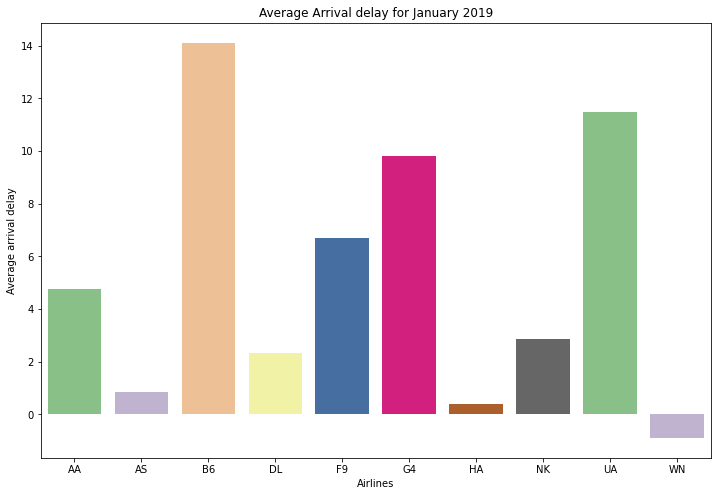

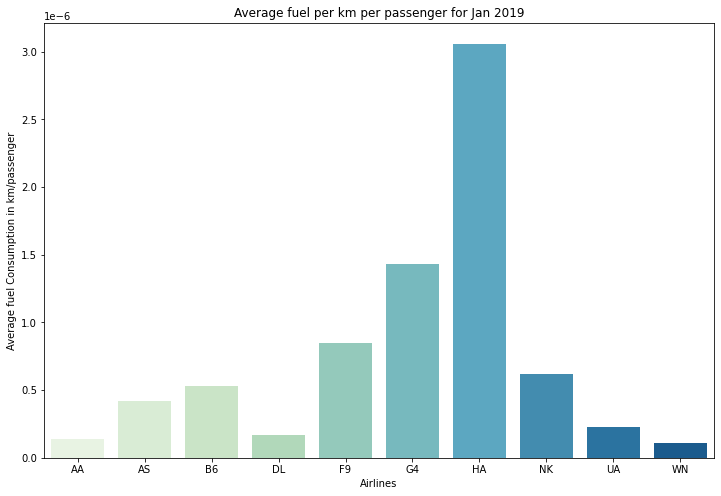

In [133]:
# Average Arrival delay for January 2019

sns.barplot(x = avgMonthly_delayJan.index ,y = avgMonthly_delayJan.values, palette='Accent')
plt.ylabel("Average arrival delay")
plt.xlabel("Airlines")
plt.title("Average Arrival delay for January 2019")
plt.show();

# Average fuel Consumption in km/passenger 

sns.barplot(x = avg_fuel_per_km_pass.index ,y = avg_fuel_per_km_pass.values, palette='GnBu')
plt.ylabel("Average fuel Consumption in km/passenger")
plt.xlabel("Airlines")
plt.title("Average fuel per km per passenger for Jan 2019")
plt.show();